# CROP YIELD FORECASTING

## import libraries

In [425]:
"""
This script performs the following operations:

1. **Imports Required Libraries**:
   - `pandas`: For data manipulation and analysis, especially with DataFrames.
   - `numpy`: For numerical operations, particularly with arrays.
   - `seaborn`: For statistical data visualization and enhancement of matplotlib plots.
   - `matplotlib.pyplot`: For creating static, animated, and interactive visualizations in Python.
   - `train_test_split`: A function from `sklearn.model_selection` for splitting datasets into training and testing subsets.
   - `GridSearchCV`: A method from `sklearn.model_selection` for hyperparameter tuning through cross-validation.
   - `RandomForestRegressor`: An ensemble learning method for regression tasks from `sklearn.ensemble`.
   - `mean_squared_error`, `mean_absolute_percentage_error`, `r2_score`: Metrics from `sklearn.metrics` for evaluating the performance of regression models.
   - `StandardScaler`: A preprocessing tool from `sklearn.preprocessing` for standardizing features by removing the mean and scaling to unit variance.

2. **Suppresses Warnings**:
   - The script imports the `warnings` library, which can be used to control the display of warnings that may arise during the execution of the code, ensuring a cleaner output.

Usage:
- This script sets the foundation for data preprocessing, model training, and evaluation in a regression analysis context.
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [426]:
df = pd.read_csv("Crop_Yield_Data.csv")

## Column Explanations

| Column Name                                         | Description                                                                                                  |
|-----------------------------------------------------|--------------------------------------------------------------------------------------------------------------|
| **Area**                                           | Represents the geographic region or area where the agricultural activity is taking place.                    |
| **Item**                                           | Indicates the specific crop or agricultural product being measured or analyzed.                              |
| **Year**                                           | Refers to the year during which the data was collected or the agricultural activity occurred.                |
| **hg/ha_yield**                                   | Measures the yield of the crop in hectograms per hectare (hg/ha), indicating productivity levels.          |
| **average_rain_fall_mm_per_year**                | Represents the average annual rainfall in millimeters, which can affect crop growth and yield.              |
| **pesticides_tonnes**                             | Indicates the amount of pesticides used in tonnes during the growing season or year.                        |
| **avg_temp**                                      | Refers to the average temperature during the growing season or year, which can influence crop performance.   |


In [ ]:
df.head()

In [427]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB
None


## preprocessing

In [428]:
"""
This code snippet performs data cleaning operations on a pandas DataFrame, `df`, by executing the following steps:

1. **Drop Rows with NaN Values**:
   - The first operation removes any rows that contain at least one NaN (Not a Number) value. This ensures that the DataFrame does not have missing values that could affect analysis or modeling.

2. **Remove Rows with All Zeros**:
   - The second operation filters the DataFrame to retain only those rows where not all elements are equal to 0. This is done by creating a boolean DataFrame that checks for non-zero values and ensures that at least one element in each row is non-zero.

3. **Remove Rows with All Empty Strings**:
   - The final operation removes rows where all elements are empty strings. Similar to the previous step, a boolean DataFrame checks for empty strings, retaining only those rows that contain at least one non-empty string.

The result is a cleaned DataFrame that is free from NaN values, rows consisting entirely of zeros, and rows containing only empty strings, making it more suitable for subsequent analysis or processing.
"""


df = df.dropna()
df = df[(df != 0).all(axis=1)]
df = df[(df != "").all(axis=1)]

In [429]:
"""
Prints the count of null values for each column in the DataFrame `df`.

This operation involves the following steps:
1. **Identify Null Values**: The `isnull()` method generates a boolean DataFrame where each element indicates whether the corresponding entry in `df` is null (NaN).
2. **Count Null Values**: The `sum()` method is applied to this boolean DataFrame to count the number of null entries in each column.
3. **Display the Count**: The results are printed to the console, displaying the column names along with their respective null value counts, prefixed by the label "Null Values:" for better readability.

This helps in assessing the completeness of the data and identifying columns that may require further cleaning or imputation.
"""


print("\nNull Values:\n", df.isnull().sum())


Null Values:
 Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [430]:
"""
Converts the specified columns in the DataFrame `df` to the 'category' data type.

This operation involves the following steps:
1. **Convert 'Area' Column**: 
   - The line `df['Area'] = df['Area'].astype('category')` converts the 'Area' column in the DataFrame to a categorical data type. This is useful for optimizing memory usage and improving performance when working with columns that contain a limited number of unique values.

2. **Convert 'Item' Column**: 
   - Similarly, `df['Item'] = df['Item'].astype('category')` converts the 'Item' column to a categorical data type. This conversion is beneficial when the column represents discrete categories, as it can reduce memory overhead and enable more efficient operations.

Overall, changing columns to the 'category' type helps in managing data more effectively, especially when dealing with large datasets that include categorical variables.
"""


df['Area'] = df['Area'].astype('category')
df['Item'] = df['Item'].astype('category')

In [431]:
"""
Filters the DataFrame `df` by grouping it based on 'Area' and 'Item', and retaining only the rows with 'hg/ha_yield' values within the specified quantiles.

This operation involves the following steps:
1. **Group by 'Area' and 'Item'**:
   - The `groupby(['Area', 'Item'])` method groups the DataFrame by the 'Area' and 'Item' columns, creating separate groups for each combination of these categorical variables.

2. **Apply Filtering Logic**:
   - The `apply()` method is used to apply a lambda function to each group. Inside the lambda function:
     - The `quantile(0.1)` method computes the 10th percentile value of 'hg/ha_yield' for the group.
     - The `quantile(0.9)` method computes the 90th percentile value of 'hg/ha_yield' for the group.
     - The lambda function then filters the group to include only those rows where 'hg/ha_yield' is greater than or equal to the 10th percentile and less than or equal to the 90th percentile.

3. **Reset Index**:
   - Finally, `reset_index(drop=True)` resets the index of the resulting DataFrame, dropping the old index and creating a new default integer index. This ensures that the final output is a clean DataFrame without any hierarchical indexing from the groupby operation.

Overall, this code effectively removes outlier values in 'hg/ha_yield' for each combination of 'Area' and 'Item', retaining only those values that fall within the middle 80% of the distribution, thereby improving the robustness of subsequent analyses.
"""


df = df.groupby(['Area', 'Item']).apply(
    lambda x: x[(x['hg/ha_yield'] >= x['hg/ha_yield'].quantile(0.1)) & 
                (x['hg/ha_yield'] <= x['hg/ha_yield'].quantile(0.9))]
).reset_index(drop=True)

In [432]:
"""
Filters the DataFrame `df` to retain only groups of 'Area' and 'Item' with at least 20 entries, and removes duplicate rows.

This operation involves the following steps:
1. **Group by 'Area' and 'Item'**:
   - The `groupby(['Area', 'Item'])` method groups the DataFrame by the 'Area' and 'Item' columns, creating separate groups for each unique combination of these categorical variables.

2. **Filter Groups**:
   - The `filter()` method is used with a lambda function that checks the length of each group. The condition `len(x) >= 20` ensures that only groups containing 20 or more rows are retained. Groups with fewer than 20 entries are discarded from the DataFrame.

3. **Remove Duplicates**:
   - The `drop_duplicates()` method is called on the filtered DataFrame to remove any duplicate rows, ensuring that each row in the resulting DataFrame is unique.

Overall, this code effectively cleans the DataFrame by keeping only those combinations of 'Area' and 'Item' that have sufficient data points (at least 20), while also eliminating any duplicate entries, which is useful for ensuring data quality in subsequent analyses.
"""

df = df.groupby(['Area', 'Item']).filter(lambda x: len(x) >= 20).drop_duplicates()

In [433]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13782 entries, 37 to 22247
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Area                           13782 non-null  category
 1   Item                           13782 non-null  category
 2   Year                           13782 non-null  int64   
 3   hg/ha_yield                    13782 non-null  int64   
 4   average_rain_fall_mm_per_year  13782 non-null  int64   
 5   pesticides_tonnes              13782 non-null  float64 
 6   avg_temp                       13782 non-null  float64 
dtypes: category(2), float64(2), int64(3)
memory usage: 678.2 KB
None


## feature engineering

In [434]:
"""
Creates new interaction features and normalizes the 'Year' column in the DataFrame `df`, as well as computes a rolling mean for 'hg/ha_yield'.

This operation involves the following steps:

1. **Create Interaction Features**:
   - `df['rain_temp_interaction']`: This line creates a new column by multiplying the 'average_rain_fall_mm_per_year' by 'avg_temp', capturing the interaction effect between rainfall and temperature on crop yield.
   - `df['rain_pesticide_interaction']`: This line creates another new column by multiplying 'average_rain_fall_mm_per_year' by 'pesticides_tonnes', representing the interaction between rainfall and pesticide usage.

2. **Normalize the 'Year' Column**:
   - `df['year_norm']`: This line normalizes the 'Year' column by subtracting the minimum year and dividing by the range (maximum year - minimum year). This transformation scales the year values to a range between 0 and 1, which is useful for modeling purposes.

3. **Calculate Rolling Mean of 'hg/ha_yield'**:
   - `df['yield_rolling_mean']`: This line computes the rolling mean of 'hg/ha_yield' for each combination of 'Area' and 'Item'. The `transform()` method is used to apply a rolling window calculation with a size of 3 and a minimum of 1 observation required to compute the mean. This results in a smoothed yield value that considers the current and previous two entries within each group.

Overall, this code enhances the DataFrame by creating meaningful interaction features, normalizing year data for better modeling performance, and providing a rolling mean of yield values to capture trends over time within specified groups.
"""

df['rain_temp_interaction'] = df['average_rain_fall_mm_per_year'] * df['avg_temp']
df['rain_pesticide_interaction'] = df['average_rain_fall_mm_per_year'] * df['pesticides_tonnes']

df['year_norm'] = (df['Year'] - df['Year'].min()) / (df['Year'].max() - df['Year'].min())

df['yield_rolling_mean'] = df.groupby(['Area', 'Item'])['hg/ha_yield'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

In [435]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,rain_temp_interaction,rain_pesticide_interaction,year_norm,yield_rolling_mean
37,Albania,Soybeans,1993,7998,1485,121.00,16.05,23834.25,179685.00,0.130435,7998.000000
38,Albania,Soybeans,1994,7927,1485,201.00,16.96,25185.60,298485.00,0.173913,7962.500000
39,Albania,Soybeans,1995,11791,1485,251.00,15.67,23269.95,372735.00,0.217391,9238.666667
40,Albania,Soybeans,1996,15480,1485,313.96,15.64,23225.40,466230.60,0.260870,11732.666667
41,Albania,Soybeans,1997,12768,1485,376.93,15.90,23611.50,559741.05,0.304348,13346.333333


## correlation check

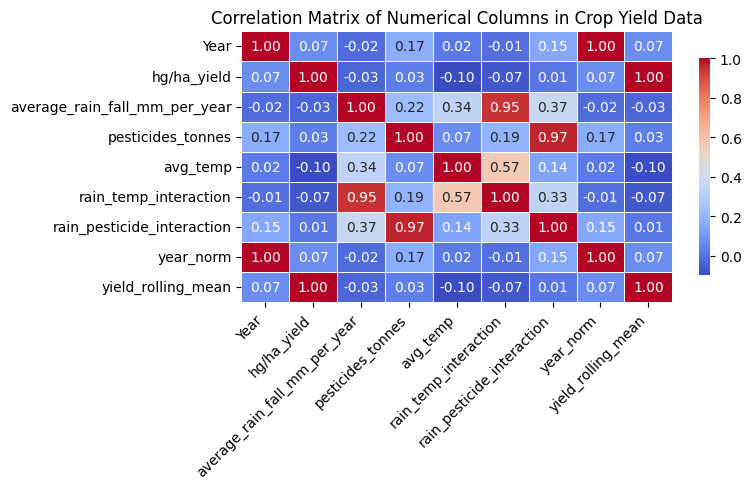

In [436]:
"""
The generated heatmap visualizes the correlation matrix of numerical columns in the crop yield dataset. 

Key insights from the graph include:
- **Positive Correlation**: Values close to +1 indicate a strong positive correlation between two variables, meaning that as one variable increases, the other tends to increase as well. For example, if 'average_rain_fall_mm_per_year' shows a strong positive correlation with 'hg/ha_yield', it suggests that higher rainfall is associated with higher crop yields.
  
- **Negative Correlation**: Values close to -1 indicate a strong negative correlation, meaning that as one variable increases, the other tends to decrease. For instance, if 'pesticides_tonnes' has a strong negative correlation with 'hg/ha_yield', it implies that increased pesticide usage may be associated with lower crop yields.

- **No Correlation**: Values near 0 suggest little to no linear relationship between the variables.

Overall, this heatmap allows for quick identification of relationships among numerical features, helping to inform decisions about which variables might be most relevant for further analysis or modeling.
"""


numerical_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Area', 'Item'], errors='ignore')

corr_matrix = numerical_df.corr()

plt.figure(figsize=(8, 5)) 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, 
            cbar_kws={'shrink': 0.8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix of Numerical Columns in Crop Yield Data")
plt.tight_layout()
plt.show()


In [437]:
"""
Converts categorical variables in the DataFrame `df` into dummy/indicator variables.

This operation specifically involves:

1. **One-Hot Encoding**:
   - The line `pd.get_dummies(df, columns=['Area', 'Item'], drop_first=True)` applies one-hot encoding to the specified categorical columns: 'Area' and 'Item'.
   - One-hot encoding transforms each category into a new binary column (0 or 1) that indicates the presence or absence of that category in the original column.
   - For example, if 'Area' has categories 'A', 'B', and 'C', and 'Item' has categories 'X' and 'Y', one-hot encoding will create new columns like 'Area_B', 'Area_C', 'Item_Y', etc.

2. **Dropping the First Category**:
   - The parameter `drop_first=True` ensures that the first category in each column is dropped to avoid multicollinearity in regression models. This is useful because it allows the remaining dummy variables to represent the presence of all categories without redundancy.

Overall, this code effectively prepares categorical data for modeling by converting them into a numerical format that machine learning algorithms can utilize.
"""


df = pd.get_dummies(df, columns=['Area', 'Item'], drop_first=True)

In [438]:
"""
Splits the DataFrame `df` into feature variables (X) and target variable (y) for modeling.

This operation involves the following steps:

1. **Feature Variables (X)**:
   - `X = df.drop(['hg/ha_yield'], axis=1)`: This line creates a new DataFrame `X` by dropping the 'hg/ha_yield' column from `df`. The resulting `X` DataFrame contains all the predictor variables (features) used for training the model, excluding the target variable.

2. **Target Variable (y)**:
   - `y = df['hg/ha_yield']`: This line creates a Series `y` that contains the 'hg/ha_yield' column from `df`. The `y` variable serves as the target or response variable that the model aims to predict.

Overall, this code effectively separates the input features from the output variable in preparation for model training and evaluation.
"""


X = df.drop(['hg/ha_yield'], axis=1)
y = df['hg/ha_yield']

In [439]:
"""
Standardizes the feature variables in the DataFrame `X` using the StandardScaler.

This operation involves the following steps:

1. **Initialize the StandardScaler**:
   - `scaler = StandardScaler()`: This line creates an instance of the `StandardScaler` class from the `sklearn.preprocessing` module. The `StandardScaler` standardizes features by removing the mean and scaling to unit variance, which is useful for algorithms that assume features are normally distributed.

2. **Fit and Transform the Features**:
   - `X_scaled = scaler.fit_transform(X)`: This line applies the `fit_transform()` method to the feature DataFrame `X`. 
     - The `fit()` part computes the mean and standard deviation for each feature in `X`.
     - The `transform()` part then scales the features by subtracting the mean and dividing by the standard deviation, resulting in a new array `X_scaled` where each feature has a mean of 0 and a standard deviation of 1.

Overall, this code prepares the feature variables by standardizing them, which can improve the performance and convergence speed of many machine learning algorithms.
"""


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [440]:
"""
Splits the standardized feature variables `X_scaled` and target variable `y` into training and testing sets.

This operation involves the following steps:

1. **Train-Test Split**:
   - `X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)`: This line uses the `train_test_split` function from the `sklearn.model_selection` module to partition the data.
     - `X_scaled`: The standardized feature variables.
     - `y`: The target variable.
     - `test_size=0.2`: Specifies that 20% of the data should be set aside for testing, while 80% will be used for training the model.
     - `random_state=42`: Ensures reproducibility by setting a seed for the random number generator, so that the split will be the same each time the code is run.

2. **Outputs**:
   - `X_train`: The training set of feature variables.
   - `X_test`: The testing set of feature variables.
   - `y_train`: The training set of the target variable.
   - `y_test`: The testing set of the target variable.

Overall, this code prepares the dataset for model training and evaluation by creating separate training and testing sets, which is essential for assessing the model's performance on unseen data.
"""

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [441]:
"""
Performs hyperparameter tuning for a Random Forest Regressor using Grid Search.

This operation involves the following steps:

1. **Define Parameter Grid**:
   - `param_grid`: A dictionary specifying the hyperparameters to be tuned for the Random Forest model. 
     - `n_estimators`: The number of trees in the forest, tested with values 100 and 200.
     - `max_features`: The number of features to consider when looking for the best split, set to 'sqrt' (square root of the number of features).
     - `max_depth`: The maximum depth of the tree, tested with values None (unrestricted depth) and 10.
     - `min_samples_split`: The minimum number of samples required to split an internal node, tested with values 2 and 5.
     - `min_samples_leaf`: The minimum number of samples required to be at a leaf node, tested with values 1 and 2.

2. **Initialize the Random Forest Regressor**:
   - `rf = RandomForestRegressor(random_state=42)`: Creates an instance of the Random Forest Regressor with a fixed random state for reproducibility.

3. **Set Up Grid Search**:
   - `grid_search = GridSearchCV(...)`: Initializes the Grid Search with the following parameters:
     - `estimator=rf`: The Random Forest model to be tuned.
     - `param_grid=param_grid`: The hyperparameters and their respective values to search.
     - `scoring='neg_mean_squared_error'`: The performance metric used for evaluation; negative mean squared error is used since lower values are better.
     - `cv=5`: Specifies 5-fold cross-validation for model evaluation.
     - `verbose=1`: Controls the verbosity of the output during the search process.
     - `n_jobs=-1`: Utilizes all available processors to speed up the computation.

4. **Fit Grid Search**:
   - `grid_search.fit(X_train, y_train)`: Fits the Grid Search model on the training data to find the best combination of hyperparameters based on the specified scoring method.

5. **Retrieve the Best Model**:
   - `best_rf = grid_search.best_estimator_`: Obtains the Random Forest model with the best hyperparameters from the Grid Search.

6. **Print Best Parameters**:
   - `print("Best Parameters:", grid_search.best_params_)`: Displays the best combination of hyperparameters found during the search.

Overall, this code snippet effectively tunes the hyperparameters of a Random Forest Regressor using Grid Search, aiming to optimize model performance based on mean squared error.
"""

param_grid = {
    'n_estimators': [100, 200],  
    'max_features': ['sqrt'],     
    'max_depth': [None, 10],      
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2] 
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [442]:
"""
Evaluates the performance of the Random Forest Regressor using various regression metrics.

This operation involves the following steps:

1. **Make Predictions**:
   - `y_pred = best_rf.predict(X_test)`: Uses the best Random Forest model obtained from Grid Search (`best_rf`) to make predictions on the test set `X_test`. The predicted values are stored in `y_pred`.

2. **Calculate Evaluation Metrics**:
   - **Root Mean Squared Error (RMSE)**:
     - `rmse = np.sqrt(mean_squared_error(y_test, y_pred))`: Calculates the RMSE, which measures the average magnitude of the errors between predicted and actual values. RMSE is the square root of the mean squared error (MSE) and provides insight into the model's prediction accuracy.
   - **R-Squared (R²)**:
     - `r2 = r2_score(y_test, y_pred)`: Computes the R-squared value, which indicates the proportion of variance in the target variable that can be explained by the model. Values closer to 1 suggest a better fit.
   - **Mean Squared Error (MSE)**:
     - `mse = mean_squared_error(y_test, y_pred)`: Calculates the MSE, which is the average of the squares of the errors, representing the average squared difference between predicted and actual values.
   - **Mean Absolute Percentage Error (MAPE)**:
     - `mape = mean_absolute_percentage_error(y_test, y_pred)`: Computes the MAPE, which measures the accuracy of the predictions as a percentage of the actual values. It provides a clear understanding of prediction errors relative to the size of the actual values.

3. **Print Evaluation Metrics**:
   - The following print statements display the calculated metrics:
     - `print(f"Root Mean Squared Error (RMSE): {rmse}")`
     - `print(f"R-Squared (R²): {r2}")`
     - `print(f"Mean Squared Error (MSE): {mse}")`
     - `print(f"Mean Absolute Percentage Error (MAPE): {mape}")`

Overall, this code snippet effectively evaluates the predictive performance of the Random Forest Regressor on the test dataset using multiple metrics, providing insight into how well the model is performing.
"""

y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Root Mean Squared Error (RMSE): 4235.103641294988
R-Squared (R²): 0.9977437299248698
Mean Squared Error (MSE): 17936102.852510065
Mean Absolute Percentage Error (MAPE): 0.05340539301866736


## Evaluation Metrics Interpretation

1. **Root Mean Squared Error (RMSE)**:  
   - **Value**: 4235.10  
   - **Interpretation**: RMSE indicates that, on average, the model's predictions deviate from the actual values by approximately 4235.10 units. A lower RMSE suggests better predictive accuracy, and this value should be interpreted in the context of the scale of the target variable.

2. **R-Squared (R²)**:  
   - **Value**: 0.9977  
   - **Interpretation**: R² is very close to 1, indicating that approximately 99.77% of the variance in the target variable can be explained by the model. This suggests an excellent fit of the model to the data.

3. **Mean Squared Error (MSE)**:  
   - **Value**: 17936102.85  
   - **Interpretation**: MSE reflects the average of the squares of the errors, and this value indicates that there are significant deviations from the actual values. While MSE provides useful information, it is influenced heavily by outliers due to the squaring of errors.

4. **Mean Absolute Percentage Error (MAPE)**:  
   - **Value**: 0.0534 (or 5.34%)  
   - **Interpretation**: MAPE indicates that the model's predictions are, on average, about 5.34% off from the actual values. This metric provides a clear percentage-based understanding of prediction accuracy, with lower values indicating better performance.

### Summary

Overall, your model demonstrates exceptional performance, as evidenced by a very high R² value, a relatively low RMSE, and a manageable MAPE. These metrics suggest that the Random Forest Regressor is making predictions that closely align with the actual outcomes in your dataset.
